# Examen 1 - Exploration de donnes
Author: Ricardo Vallejo

# Etape 1

## 1.1. Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('USA_cars_dataset.xlsx')
df.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## 1.2.  Identifiez les différentes variables et leurs types. Résumez le tout dans un tableau.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


## 1.3. Déterminer le nombre de voitures vendues annuellement. Interprétez les résultats

In [3]:
df[['lot', 'year']].groupby('year').count()


,lot
year,
1973,1
1984,1
1993,1
1994,2
1995,1
1996,2
1997,2
1998,4
1999,1


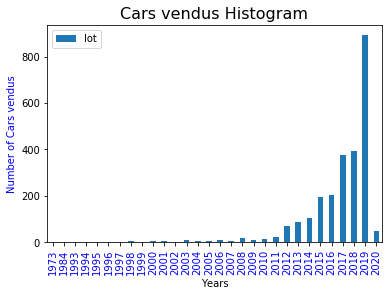

In [4]:
df[['lot', 'year']].groupby('year').count().plot(kind='bar')
plt.title('Cars vendus Histogram', color = 'black', fontsize = 16)
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Cars vendus', color = 'blue')
plt.xticks(color = 'blue')
plt.yticks(color = 'black')
plt.show()

# Étape 2 : Analyse des prix de voiture

# 1. À partir du fichier USA_cars_dataset.xlsx, créez une nouvelle structure df2010 qui contient les observations 
entre 2010 (inclus) et 2020 (exlus).


In [5]:
yearscond = list(range(2009, 2020))

In [6]:
is2010 =  df['year'].isin(yearscond)

In [7]:
df2010 = df[is2010]

df2010.head(100)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,102,10780,ford,mpv,2017,clean vehicle,40455.0,white,1fm5k8ht0hga07252,167656360,texas,usa,2 days left
103,103,13800,ford,focus,2018,clean vehicle,23164.0,white,1fadp3j2xjl279400,167755491,south carolina,usa,21 hours left
104,104,25201,cadillac,door,2017,clean vehicle,19011.0,no_color,1gyknbrs8hz257399,167765111,michigan,usa,2 days left
105,105,7070,ford,mpv,2017,clean vehicle,45191.0,white,1fm5k7d82hgb39148,167656361,texas,usa,2 days left


# 2. On s’intéresse uniquement à la variable price des voitures. Résumez dans un tableau deux indicateurs descriptifs de tendances centrales, deux de dispersions et deux de formes de cette variable.


# Deux tendence central.

In [8]:
price = df2010['price']
price.head(5)

1     2899
2     5350
3    25000
4    27700
5     5700
Name: price, dtype: int64

In [9]:
price.mode()

0    16500
dtype: int64

In [10]:
price.mean()

19189.131956155143

# Deux dispersion

In [11]:
import statistics 

statistics.stdev(price)

11844.723105701421

In [12]:

statistics.variance(price)

140297465.45073712

# Deux de forme

In [13]:
price.skew()

0.9656648298546364

# 3. Visualisez graphiquement un indicateur de tendance centrale et un indicateur de forme.

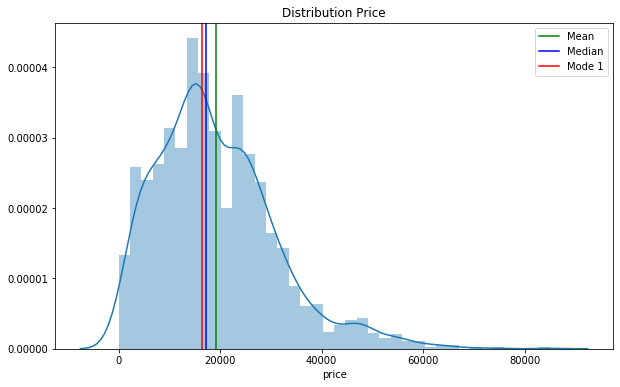

In [14]:
import seaborn as sns

mean=price.mean();
median=price.median();
mode=price.mode();
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(price);
plt.title('Distribution Price');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend()

# Faites le lien entre les représentations graphiques et les indicateurs et commentez les résultats.

# Étape 3 : Analyse des ventes de voiture

In [15]:
dfventes = df2010[['lot', 'brand']].groupby('brand').count()
dfventes

dfventes.sort_values(by=['lot'], inplace=True, ascending=False)
dfventes2 = dfventes.head(6) #First 5 after order
dfventes2

,lot
brand,
ford,1189
dodge,424
nissan,298
chevrolet,262
gmc,39
jeep,28


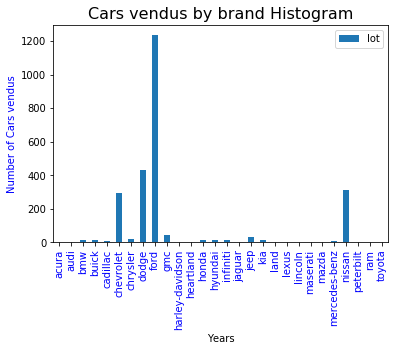

In [16]:
df[['lot', 'brand']].groupby('brand').count().plot(kind='bar')
plt.title('Cars vendus by brand Histogram', color = 'black', fontsize = 16)
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Cars vendus', color = 'blue')
plt.xticks(color = 'blue')
plt.yticks(color = 'black')
plt.show()

# Les cars le plus vendus sont ford=1189, dodge=424 et chevrolet=262

# 2. Visualisez la variation de vente annuelle de chacune des 6 marques (sur un même graphique)


Text(0.5, 0, 'Year')

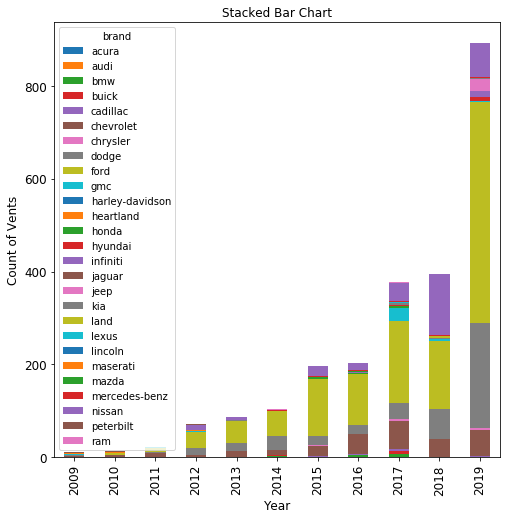

In [17]:
FreqData2_table = pd.crosstab(columns=df2010['brand'], index=df2010['year'])
FreqData2_table.reset_index()

Stacked = FreqData2_table.plot(kind="bar",figsize=(8,8),stacked=True,title='Stacked Bar Chart',fontsize=12)
Stacked.set_ylabel("Count of Vents",fontsize=12)
Stacked.set_xlabel("Year",fontsize=12)

# Étape 4 : Analyse des relations

# Pensez-vous qu’il y a une relation entre le prix price et la distance parcourue mileage ? Expliquez la démarche et
les résultats obtenus.

In [18]:
df2010.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left


Text(0.5, 1.0, 'Variation de Price vs Millaige')

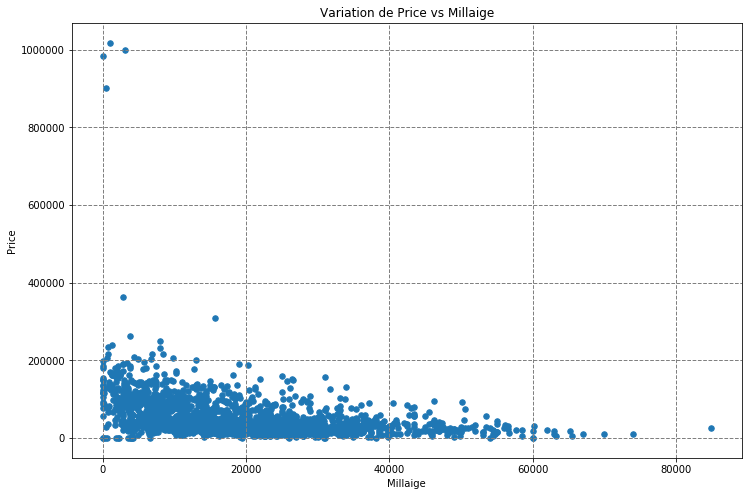

In [19]:
fig = plt.figure(figsize=(12,8))
plt.scatter( df2010['price'], df2010["mileage"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Price")
plt.xlabel("Millaige")
plt.title('Variation de Price vs Millaige')

# Graphiquement on a pas une relation lineaire entre les deux variables.

In [20]:
# Regression Lineaire

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

x1 = np.array(df2010['price']).reshape((-1,1))
y1 = df2010['mileage']

mymodel = LinearRegression()
results = mymodel.fit(x1,y1)

print("Coeficient determination: \n", results.score(x1, y1))
print("Intercept: \n", results.intercept_)
print("Slope: \n", results.coef_)

Coeficient determination: 
 0.12446583982016178
Intercept: 
 80379.37301767626
Slope: 
 [-1.62942198]


# Le coeficient de determination cest tres bas, donc pas de relation lineaire entre variables.

In [21]:
from statsmodels.formula.api import ols

model2 = ols('price ~ mileage', data=df2010).fit() #x vs y
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     336.9
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           1.82e-70
Time:                        21:36:42   Log-Likelihood:                -25456.
No. Observations:                2372   AIC:                         5.092e+04
Df Residuals:                    2370   BIC:                         5.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.294e+04    305.908     74.992      0.0

# 3. Les variables prix price et title_status contiennent plusieurs valeurs aberrantes. En fixant un seuil à 2 (threshold = 2), supprimer
les valeurs aberrantes en utilisant la distance interquartile.

In [22]:
def is_outlier(value, p25, p75):
    # Check if value is an outlier
    lower = p25 - 1.5 * (p75 - p25)
    upper = p75 + 1.5 * (p75 - p25)
    return value <= lower or value >= upper


def get_indices_of_outliers(values):
    #Get outlier indices (if any)
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
     
    indices_of_outliers = []
    for ind, value in enumerate(values):
        if is_outlier(value, p25, p75):
            indices_of_outliers.append(ind)
    return indices_of_outliers


indices_of_outliers = get_indices_of_outliers(df2010['price'])
df2010['price'][indices_of_outliers] = mean; #np.percentile(df2010['price'], 75, interpolation = 'midpoint') - np.percentile(df2010['price'], 25, interpolation = 'midpoint') 

C:\Users\valm044\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ValueError: [313 347] not contained in the index

# Excercise 4

In [25]:

from scipy import stats

results = stats.ttest_1samp(df2010['price'], 20000, 0)
print('stattiscit: ', results[0])
print('p_value: ', results[1])

stattiscit:  -3.3341306580162486
p_value:  0.0008688293624366382


In [26]:
# interpret p-value 
alpha = 0.05
if results[1] <= alpha: 
    print('(reject H0)') 
else: 
    print('(H0 holds true)') 

(reject H0)


In [ ]:
# Nos rejectons que la moyenne cest 20000